In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def gen_pop(size, items):
    return np.random.randint(2, size=(size, items))

In [11]:
def fitness(pop, weights, values, capacity):
    penalty = np.maximum(0, np.dot(pop, weights) - capacity)
    return np.dot(pop, values)-penalty.max()

In [12]:
def tournament_selection(pop, fitness, size = 5):
    return pop[np.argmax(np.random.choice(fitness, size=size))]

In [13]:
def crossover(parent1, parent2):
    point = np.random.randint(len(parent1))
    return np.concatenate([parent1[:point], parent2[point:]])

In [16]:
def mutate(child, mutation_rate):
    return np.logical_xor(child, np.random.rand(len(child)) < mutation_rate)

[ True  True  True  True  True  True False] 56


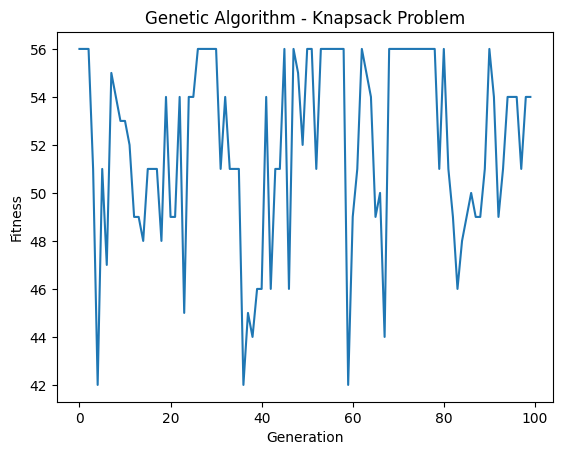

In [21]:
def genetic_algorithm(weights, values, capacity, size=50, generations=100, mutation_rate=0.1):
    pop, hist = gen_pop(size, len(weights)),[]
    for _ in range(generations):
        fit = fitness(pop, weights, values, capacity)
        best = pop[np.argmax(fit)]
        hist.append(np.max(fit))
        
        pop = np.array([crossover(tournament_selection(pop, fit), tournament_selection(pop, fit)) for _ in range(size//2)])
        
        if size % 2 != 0:
            pop = np.vtack([pop, np.zeros_like(pop[0])])
            
        if len(pop) < size:
            additional_pop = gen_pop(1, len(weights))
            pop = np.vstack([pop, additional_pop])
            
        pop[np.argmin(fit)] = best
        pop = np.array([mutate(ind, mutation_rate) for ind in pop])
    plt.plot(hist)
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title('Genetic Algorithm - Knapsack Problem')
    
    return best, np.max(hist)

w = [2, 3, 5, 7, 1, 4, 1]
v = [10, 5, 15, 7, 6, 18, 3]
c = 15

best_sol, optimal_cost = genetic_algorithm(w,v,c)

print(best_sol, optimal_cost,end="\n")
